In [22]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Import files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the data and results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine data into a single dataset
data_results = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

In [3]:
# Preview the data table
data_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Check the number of mice
mice = data_results["Mouse ID"].nunique()
mice

249

In [5]:
# Look for duplicate data by mouse ID and timepoint
dupes = data_results[data_results.duplicated(subset = ["Mouse ID", "Timepoint"])]
dupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Display all data for this mouse ID
data_results.loc[data_results["Mouse ID"] == 'g989', :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Drop data for duplicated mouse ID
dupeID = data_results[data_results["Mouse ID"] == "g989"].index
dupeID

Int64Index([908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920], dtype='int64')

In [8]:
data_results.drop(dupeID, inplace = True)

In [9]:
# Check the number of mice in the cleaned dataframe
numberofmice = data_results["Mouse ID"].nunique()
numberofmice

248

In [16]:
# Summary Statistics

# Generate a summary table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby & statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drugGroups = data_results.groupby("Drug Regimen")
tumormean = drugGroups["Tumor Volume (mm3)"].mean()
tumormedian = drugGroups["Tumor Volume (mm3)"].median()
tumorvariance = drugGroups["Tumor Volume (mm3)"].var()
tumorstd = drugGroups["Tumor Volume (mm3)"].std()
tumorsem = drugGroups["Tumor Volume (mm3)"].sem()
tumormean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [18]:
# Assemble the resulting series into a single summary dataframe.

tumorData = pd.concat([tumormean, tumormedian, tumorvariance, tumorstd, tumorsem], axis = 1)
tumorData

,Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3),Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [39]:
# Assemble into a single summary dataframe using aggregate.

tumorAggData = drugGroups[['Tumor Volume (mm3)']].aggregate([np.mean, np.median, np.var, np.std, st.sem])
tumorAggData

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [102]:
# Bar and Pie Charts

micePerDrug = pd.DataFrame(drugGroups["Timepoint"].count())
micePerDrugSort= micePerDrug.sort_values('Timepoint', ascending=False)
micePerDrugSort


,Timepoint
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


Text(0.5, 0, 'Drug Regimen')

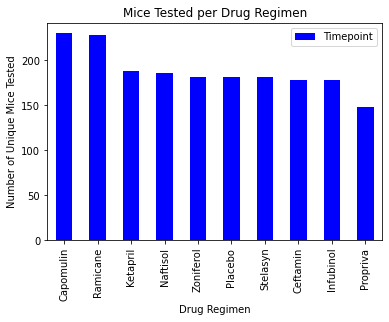

In [106]:
micePerDrugSort.plot(kind="bar", facecolor="blue", title="Mice Tested per Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.xlabel("Drug Regimen")

Text(0, 0.5, 'Number of Unique Mice Tested')

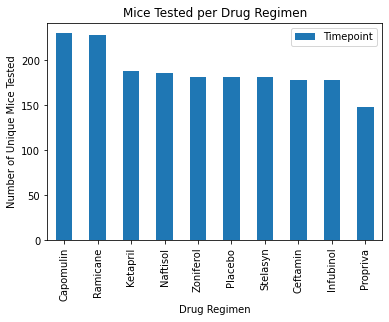

In [104]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
miceChart = micePerDrugSort.plot(kind="bar", title="Mice Tested per Drug Regimen")
miceChart.set_xlabel("Drug Regimen")
miceChart.set_ylabel("Number of Unique Mice Tested")

In [131]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# mouseGender = data_results.groupby(['Mouse ID','Sex'])
mouseGender = data_results.drop_duplicates(subset="Mouse ID")
genderPie = mouseGender.plot(kind="pie", y='Sex', title=("Gender distribution of Mice"))
# genderPie.set_ylabel("Sex")

TypeError: '<' not supported between instances of 'str' and 'int'

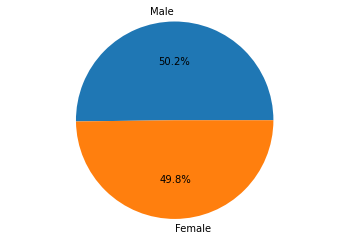

In [127]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
plt.pie(mouseGender['Sex'].value_counts(), labels=labels, autopct="%1.1f%%")
# plt.set_ylabel("Sex")
plt.axis("equal")
plt.show()

In [ ]:
# Quartiles, Outliers and Boxplots

